In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from config import apiKeyOpenWeather


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
outputDataFile = "outputData/cities.csv"

# Range of latitudes and longitudes
latRange = (-90, 90)
lngRange = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
latLngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(latRange[0], latRange[1], size=1500)
lngs = np.random.uniform(lngRange[0], lngRange[1], size=1500)
latLngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for latLng in latLngs:
    city = citipy.nearest_city(latLng[0], latLng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [4]:
#Create dataframe based on cities list

cityFrame=pd.DataFrame({'City':cities})

cityFrame.head()

,City
0,rikitea
1,ponta do sol
2,amderma
3,mataura
4,flinders


In [5]:
#Create dataframe skeleton

cityFrame['Lat']=''
cityFrame['Lng']=''
cityFrame['MaxTemp']=''
cityFrame['Humidity']=''
cityFrame['Cloudiness']=''
cityFrame['WindSpeed']=''
cityFrame['Country']=''
cityFrame['Date']=''
cityFrame.head()

,City,Lat,Lng,MaxTemp,Humidity,Cloudiness,WindSpeed,Country,Date
0,rikitea,,,,,,,,
1,ponta do sol,,,,,,,,
2,amderma,,,,,,,,
3,mataura,,,,,,,,
4,flinders,,,,,,,,


In [6]:
#Get number of cities 

numCities=len(cities)

#Initialize counter

count=1

#Iterate through index and row in data frame 

for index, row in cityFrame.iterrows():
    
    #Use city name from dataframe as search variable
    
    city=cityFrame.loc[index, 'City']
    
    #Build url

    queryUrl=f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={apiKeyOpenWeather}&units=imperial"
    
    #Get data
    
    response=requests.get(queryUrl).json()
    
    try:
        
        #Retrieve relevant data from api, store in variables

        lon=response['coord']['lon']

        lat=response['coord']['lat']

        maxTemp=response['main']['temp_max']

        humidity=response['main']['humidity']

        cloudiness=response['clouds']['all']

        windspeed=response['wind']['speed']

        country=response['sys']['country']

        date=response['dt']
        
        #Write data to dataframe
        
        cityFrame.loc[index,'Lat']=lat
        
        cityFrame.loc[index,'Lng']=lon
        
        cityFrame.loc[index,'MaxTemp']=maxTemp
        
        cityFrame.loc[index,'Humidity']=humidity
        
        cityFrame.loc[index,'Cloudiness']=cloudiness
        
        cityFrame.loc[index,'WindSpeed']=windspeed
        
        cityFrame.loc[index,'Country']=country
        
        cityFrame.loc[index,'Date']=date
                
        print(f"Processing city number {count} of {numCities}: {city}")
        
        count=count+1

    except KeyError:
        
        #If city is not found in API, inform user and drop data from the dataframe
        
        print("City not found. Skipping")
        
        cityFrame=cityFrame.drop(index=index)
                
    pass


Processing city number 1 of 618: rikitea
Processing city number 2 of 618: ponta do sol
City not found. Skipping
Processing city number 3 of 618: mataura
Processing city number 4 of 618: flinders
Processing city number 5 of 618: spornoye
Processing city number 6 of 618: ekhabi
Processing city number 7 of 618: sale
Processing city number 8 of 618: oistins
Processing city number 9 of 618: vaini
Processing city number 10 of 618: airai
Processing city number 11 of 618: pisco
Processing city number 12 of 618: sao filipe
Processing city number 13 of 618: arraial do cabo
Processing city number 14 of 618: douglas
Processing city number 15 of 618: birur
Processing city number 16 of 618: punta arenas
Processing city number 17 of 618: kodiak
Processing city number 18 of 618: ushuaia
Processing city number 19 of 618: puerto ayora
Processing city number 20 of 618: san antonio
Processing city number 21 of 618: caiaponia
Processing city number 22 of 618: saldanha
Processing city number 23 of 618: buss

Processing city number 181 of 618: greifswald
Processing city number 182 of 618: slave lake
Processing city number 183 of 618: thai binh
Processing city number 184 of 618: oranjemund
Processing city number 185 of 618: inhambane
City not found. Skipping
Processing city number 186 of 618: nemuro
Processing city number 187 of 618: katubao
City not found. Skipping
Processing city number 188 of 618: berlevag
Processing city number 189 of 618: la palma
City not found. Skipping
Processing city number 190 of 618: kharp
Processing city number 191 of 618: talnakh
Processing city number 192 of 618: adrar
Processing city number 193 of 618: sabang
Processing city number 194 of 618: nabire
Processing city number 195 of 618: kaeo
Processing city number 196 of 618: mabaruma
Processing city number 197 of 618: nikolskoye
City not found. Skipping
Processing city number 198 of 618: bilma
Processing city number 199 of 618: zhigansk
Processing city number 200 of 618: ajaccio
Processing city number 201 of 61

City not found. Skipping
Processing city number 352 of 618: muzhi
Processing city number 353 of 618: sabha
Processing city number 354 of 618: peruibe
Processing city number 355 of 618: maniitsoq
Processing city number 356 of 618: lima
City not found. Skipping
Processing city number 357 of 618: balakhninskiy
Processing city number 358 of 618: bud
Processing city number 359 of 618: fomboni
Processing city number 360 of 618: tongliao
Processing city number 361 of 618: madera
Processing city number 362 of 618: kameda
Processing city number 363 of 618: lahij
City not found. Skipping
Processing city number 364 of 618: baiyin
Processing city number 365 of 618: ust-kuyga
Processing city number 366 of 618: griffith
Processing city number 367 of 618: lazaro cardenas
Processing city number 368 of 618: chaiya
Processing city number 369 of 618: lavos
Processing city number 370 of 618: morgan city
Processing city number 371 of 618: fort frances
Processing city number 372 of 618: aklavik
Processing c

Processing city number 531 of 618: belaya gora
Processing city number 532 of 618: beringovskiy
Processing city number 533 of 618: acarau
Processing city number 534 of 618: yeppoon
Processing city number 535 of 618: elko
Processing city number 536 of 618: buturlino
Processing city number 537 of 618: port-gentil
Processing city number 538 of 618: yenagoa
Processing city number 539 of 618: glossop
Processing city number 540 of 618: nanakuli
Processing city number 541 of 618: brignoles
Processing city number 542 of 618: katowice
Processing city number 543 of 618: grafenau
Processing city number 544 of 618: port blair
Processing city number 545 of 618: tual
Processing city number 546 of 618: olmos
City not found. Skipping
Processing city number 547 of 618: otradnoye
Processing city number 548 of 618: viking
Processing city number 549 of 618: malakal
Processing city number 550 of 618: portland
Processing city number 551 of 618: correia pinto
Processing city number 552 of 618: lieksa
Processi

In [7]:
cityFrame

,City,Lat,Lng,MaxTemp,Humidity,Cloudiness,WindSpeed,Country,Date
0,rikitea,-23.1203,-134.969,79.32,78,10,17.6,PF,1613317351
1,ponta do sol,32.6667,-17.1,64.4,72,0,4.61,PT,1613317383
3,mataura,-46.1927,168.864,57,93,48,5.99,NZ,1613317374
4,flinders,-34.5833,150.855,64.99,84,32,1.99,AU,1613317454
5,spornoye,50.8448,37.2913,12.2,73,90,11.18,RU,1613317455
...,...,...,...,...,...,...,...,...,...
612,adjumani,3.3779,31.7909,90.37,23,79,1.07,UG,1613317273
613,catio,11.2833,-15.25,88.25,37,1,12.12,GW,1613317571
614,yaan,7.3833,8.5667,101.84,19,2,2.15,NG,1613317571
616,aksehir,38.3575,31.4164,45.48,58,4,6.6,TR,1613317571


In [8]:
#Export to CSV

cityFrame.to_csv('cityFrame.csv', index=False)

In [9]:
cityFrame

,City,Lat,Lng,MaxTemp,Humidity,Cloudiness,WindSpeed,Country,Date
0,rikitea,-23.1203,-134.969,79.32,78,10,17.6,PF,1613317351
1,ponta do sol,32.6667,-17.1,64.4,72,0,4.61,PT,1613317383
3,mataura,-46.1927,168.864,57,93,48,5.99,NZ,1613317374
4,flinders,-34.5833,150.855,64.99,84,32,1.99,AU,1613317454
5,spornoye,50.8448,37.2913,12.2,73,90,11.18,RU,1613317455
...,...,...,...,...,...,...,...,...,...
612,adjumani,3.3779,31.7909,90.37,23,79,1.07,UG,1613317273
613,catio,11.2833,-15.25,88.25,37,1,12.12,GW,1613317571
614,yaan,7.3833,8.5667,101.84,19,2,2.15,NG,1613317571
616,aksehir,38.3575,31.4164,45.48,58,4,6.6,TR,1613317571


In [10]:
#Check data frame for cities with humidity over 100% 

cityFrame.loc[cityFrame['Humidity']>100, :]

#There are no cities with humidity over 100

,City,Lat,Lng,MaxTemp,Humidity,Cloudiness,WindSpeed,Country,Date


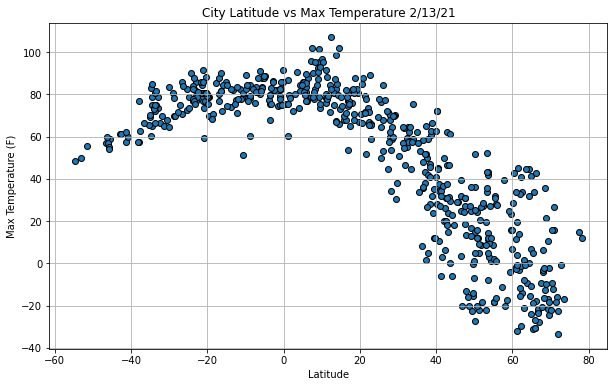

In [11]:
#Create plot using latitude and maxtemp from our dataframe

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x = cityFrame['Lat'], y = cityFrame['MaxTemp'], edgecolors='k')

ax.grid()

plt.xlabel("Latitude")

plt.ylabel("Max Temperature (F)")

plt.title("City Latitude vs Max Temperature 2/13/21")

#Export as png

plt.savefig('LatitudeVsMaxTemp.png')

plt.show()

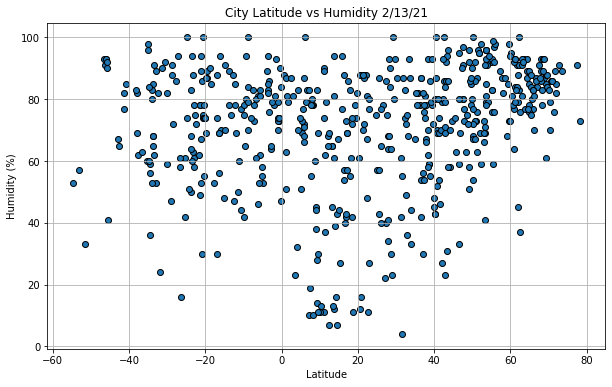

In [12]:
#Create plot using latitude and humidity from our dataframe

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x = cityFrame['Lat'], y = cityFrame['Humidity'], edgecolors='k')

ax.grid()

plt.xlabel("Latitude")

plt.ylabel("Humidity (%)")

plt.title("City Latitude vs Humidity 2/13/21")

#Export as png

plt.savefig('LatitudeVsHumidity.png')

plt.show()

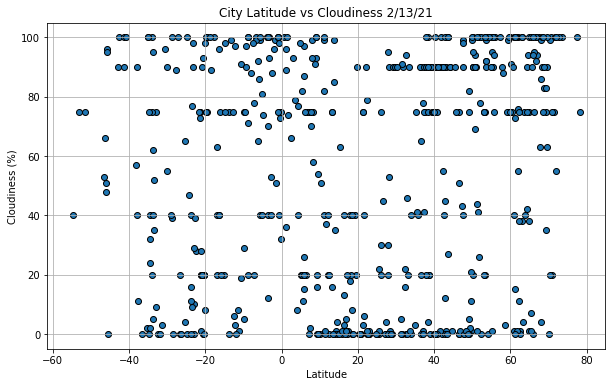

In [13]:
#Create plot using latitude and maxtemp from our dataframe

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x = cityFrame['Lat'], y = cityFrame['Cloudiness'], edgecolors='k')

ax.grid()

plt.xlabel("Latitude")

plt.ylabel("Cloudiness (%)")

plt.title("City Latitude vs Cloudiness 2/13/21")

#Export as png

plt.savefig('LatitudeVsCloudiness.png')

plt.show()

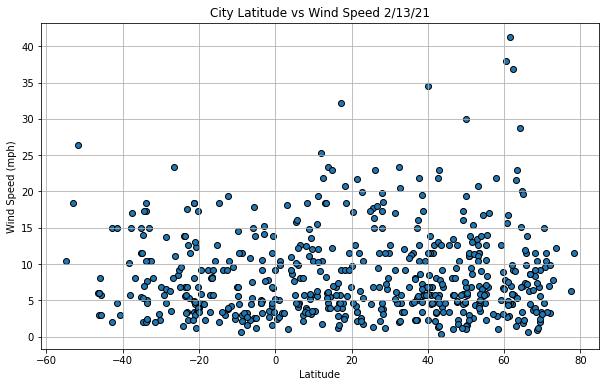

In [14]:
#Create plot using latitude and maxtemp from our dataframe

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x = cityFrame['Lat'], y = cityFrame['WindSpeed'], edgecolors='k')

ax.grid()

plt.xlabel("Latitude")

plt.ylabel("Wind Speed (mph)")

plt.title("City Latitude vs Wind Speed 2/13/21")

#Export as png

plt.savefig('LatitudeVsWindSpeed.png')

plt.show()

In [15]:
#Create dataframe for northern hemisphere

northernFrame=cityFrame.loc[cityFrame['Lat']>=0, :]
northernFrame

,City,Lat,Lng,MaxTemp,Humidity,Cloudiness,WindSpeed,Country,Date
1,ponta do sol,32.6667,-17.1,64.4,72,0,4.61,PT,1613317383
5,spornoye,50.8448,37.2913,12.2,73,90,11.18,RU,1613317455
6,ekhabi,53.5102,142.967,11.32,96,92,4.83,RU,1613317455
7,sale,34.0389,-6.8166,75.2,33,0,9.22,MA,1613317256
8,oistins,13.0667,-59.5333,80.6,65,75,18.41,BB,1613317455
...,...,...,...,...,...,...,...,...,...
612,adjumani,3.3779,31.7909,90.37,23,79,1.07,UG,1613317273
613,catio,11.2833,-15.25,88.25,37,1,12.12,GW,1613317571
614,yaan,7.3833,8.5667,101.84,19,2,2.15,NG,1613317571
616,aksehir,38.3575,31.4164,45.48,58,4,6.6,TR,1613317571


In [16]:
#Create dataframe for southern hemisphere

southernFrame=cityFrame.loc[cityFrame['Lat']<=0, :]
southernFrame

,City,Lat,Lng,MaxTemp,Humidity,Cloudiness,WindSpeed,Country,Date
0,rikitea,-23.1203,-134.969,79.32,78,10,17.6,PF,1613317351
3,mataura,-46.1927,168.864,57,93,48,5.99,NZ,1613317374
4,flinders,-34.5833,150.855,64.99,84,32,1.99,AU,1613317454
9,vaini,-21.2,-175.2,77,94,20,3.44,TO,1613317455
10,airai,-8.9266,125.409,60.46,100,100,0.65,TL,1613317455
...,...,...,...,...,...,...,...,...,...
598,tual,-5.6667,132.75,82.98,81,100,17.83,ID,1613317150
599,olmos,-5.9847,-79.7453,81.36,53,86,5.35,PE,1613317567
605,correia pinto,-27.5847,-50.3611,71.58,86,89,6.29,BR,1613317569
607,kikwit,-5.041,18.8162,88.74,55,81,1.19,CD,1613317570


The r-value is -0.8713368185656187


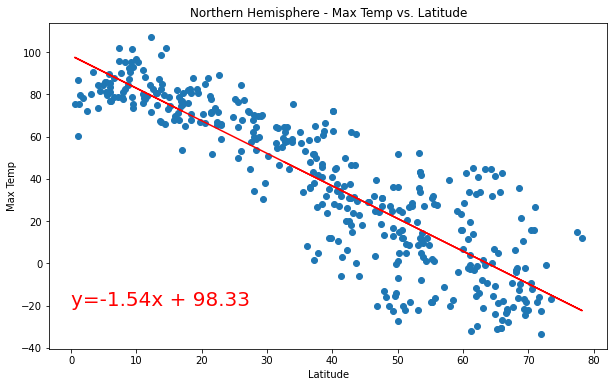

In [17]:
#Create plot using latitude and maxtemp from our northern dataframe

xValues=northernFrame['Lat'].astype('float')

yValues=northernFrame['MaxTemp'].astype('float')

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x = xValues, y = yValues)

plt.xlabel("Latitude")

plt.ylabel("Max Temp")

#Get slope and intercept from data

(slope, intercept, rvalue, pvalue, stderr)=linregress(xValues,yValues)

#Create line

regressValues=(xValues*slope)+intercept

plt.plot(xValues, regressValues, color='r')

#Create and annotate line equation

lineEq=f"y={round(slope, 2)}x + {round(intercept, 2)}"

plt.annotate(lineEq, (-0, -20), fontsize=20, color='r')

plt.title('Northern Hemisphere - Max Temp vs. Latitude')

#Export as png

print(f"The r-value is {rvalue}")

plt.savefig('NorthernLatitudeVsMaxTemp.png')

plt.show()


The r-value is 0.6490455970120681


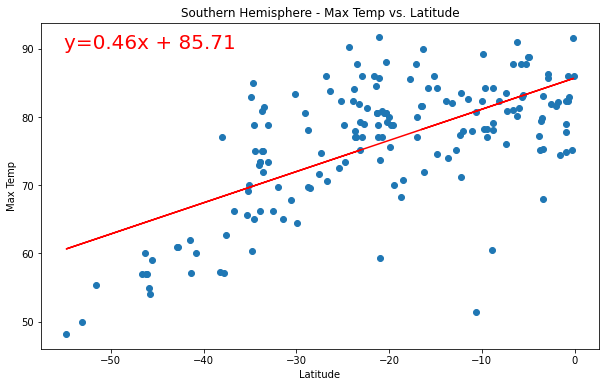

In [18]:
#Create plot using latitude and maxtemp from our southern dataframe

xValues=southernFrame['Lat'].astype('float')

yValues=southernFrame['MaxTemp'].astype('float')

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x = xValues, y = yValues)

plt.xlabel("Latitude")

plt.ylabel("Max Temp")

#Get slope and intercept from data

(slope, intercept, rvalue, pvalue, stderr)=linregress(xValues,yValues)

#Create line

regressValues=(xValues*slope)+intercept

plt.plot(xValues, regressValues, color='r')

#Create and annotate line equation

lineEq=f"y={round(slope, 2)}x + {round(intercept, 2)}"

plt.annotate(lineEq, (-55, 90), fontsize=20, color='r')

plt.title('Southern Hemisphere - Max Temp vs. Latitude')


#Export as png

print(f"The r-value is {rvalue}")

plt.savefig('SouthernLatitudeVsMaxTemp.png')

plt.show()


The r-value is 0.4414469670400112


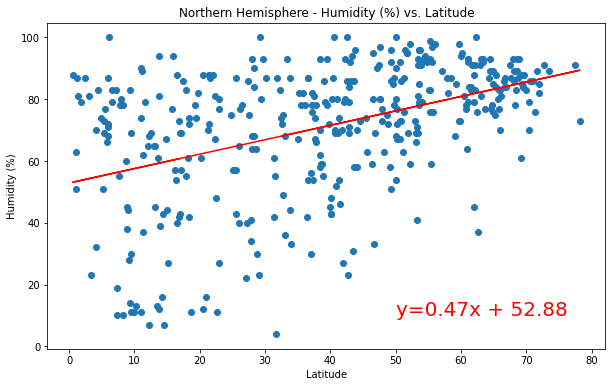

In [19]:
#Create plot using latitude and humidity from our northern dataframe

xValues=northernFrame['Lat'].astype('float')

yValues=northernFrame['Humidity'].astype('float')

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x = xValues, y = yValues)

plt.xlabel("Latitude")

plt.ylabel("Humidity (%)")

#Get slope and intercept from data

(slope, intercept, rvalue, pvalue, stderr)=linregress(xValues,yValues)

#Create line

regressValues=(xValues*slope)+intercept

plt.plot(xValues, regressValues, color='r')

plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')


#Create and annotate line equation

lineEq=f"y={round(slope, 2)}x + {round(intercept, 2)}"

plt.annotate(lineEq, (50, 10), fontsize=20, color='r')

#Export as png

print(f"The r-value is {rvalue}")

plt.savefig('NorthernLatitudeVsHumidity.png')

plt.show()


The r-value is 0.05393042507661189


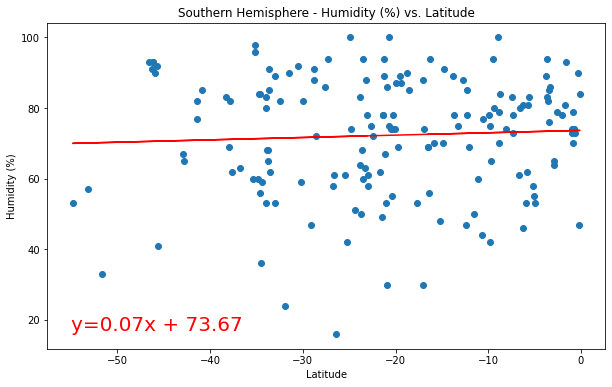

In [20]:
#Create plot using latitude and humidity from our southern dataframe

xValues=southernFrame['Lat'].astype('float')

yValues=southernFrame['Humidity'].astype('float')

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x = xValues, y = yValues)

plt.xlabel("Latitude")

plt.ylabel("Humidity (%)")

#Get slope and intercept from data

(slope, intercept, rvalue, pvalue, stderr)=linregress(xValues,yValues)

#Create line

regressValues=(xValues*slope)+intercept

plt.plot(xValues, regressValues, color='r')

plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')


#Create and annotate line equation

lineEq=f"y={round(slope, 2)}x + {round(intercept, 2)}"

plt.annotate(lineEq, (-55, 17), fontsize=20, color='r')

#Export as png

print(f"The r-value is {rvalue}")

plt.savefig('southernLatitudeVsHumidity.png')

plt.show()


The r-value is 0.30628948874324574


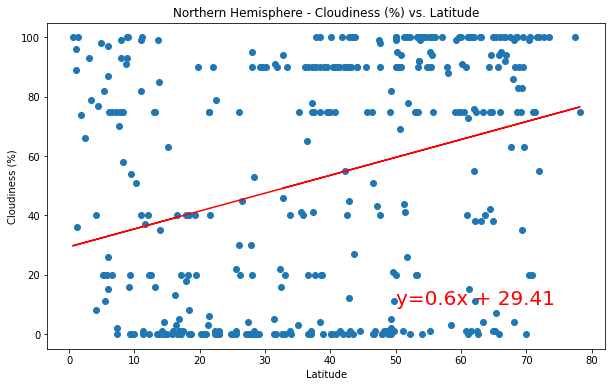

In [21]:
#Create plot using latitude and cloudiness from our northern dataframe

xValues=northernFrame['Lat'].astype('float')

yValues=northernFrame['Cloudiness'].astype('float')

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x = xValues, y = yValues)

plt.xlabel("Latitude")

plt.ylabel("Cloudiness (%)")

#Get slope and intercept from data

(slope, intercept, rvalue, pvalue, stderr)=linregress(xValues,yValues)

#Create line

regressValues=(xValues*slope)+intercept

plt.plot(xValues, regressValues, color='r')

plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')


#Create and annotate line equation

lineEq=f"y={round(slope, 2)}x + {round(intercept, 2)}"

plt.annotate(lineEq, (50, 10), fontsize=20, color='r')

#Export as png

print(f"The r-value is {rvalue}")

plt.savefig('NorthernLatitudeVsCloudiness.png')

plt.show()


The r-value is 0.16508696062406675


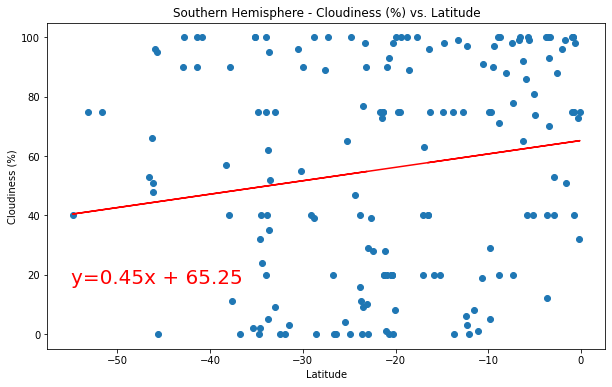

In [22]:
#Create plot using latitude and cloudiness from our southern dataframe

xValues=southernFrame['Lat'].astype('float')

yValues=southernFrame['Cloudiness'].astype('float')

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x = xValues, y = yValues)

plt.xlabel("Latitude")

plt.ylabel("Cloudiness (%)")

#Get slope and intercept from data

(slope, intercept, rvalue, pvalue, stderr)=linregress(xValues,yValues)

#Create line

regressValues=(xValues*slope)+intercept

plt.plot(xValues, regressValues, color='r')

plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')


#Create and annotate line equation

lineEq=f"y={round(slope, 2)}x + {round(intercept, 2)}"

plt.annotate(lineEq, (-55, 17), fontsize=20, color='r')

#Export as png

print(f"The r-value is {rvalue}")

plt.savefig('southernLatitudeVsCloudiness.png')

plt.show()


The r-value is -0.009483099348633665


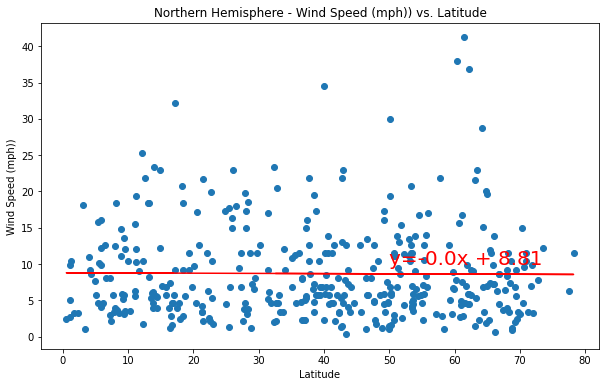

In [23]:
#Create plot using latitude and wind speed from our northern dataframe

xValues=northernFrame['Lat'].astype('float')

yValues=northernFrame['WindSpeed'].astype('float')

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x = xValues, y = yValues)

plt.xlabel("Latitude")

plt.ylabel("Wind Speed (mph))")

#Get slope and intercept from data

(slope, intercept, rvalue, pvalue, stderr)=linregress(xValues,yValues)

#Create line

regressValues=(xValues*slope)+intercept

plt.plot(xValues, regressValues, color='r')

plt.title('Northern Hemisphere - Wind Speed (mph)) vs. Latitude')


#Create and annotate line equation

lineEq=f"y={round(slope, 2)}x + {round(intercept, 2)}"

plt.annotate(lineEq, (50, 10), fontsize=20, color='r')

#Export as png

print(f"The r-value is {rvalue}")

plt.savefig('NorthernLatitudeVsWindSpeed.png')

plt.show()


The r-value is -0.18354352183020392


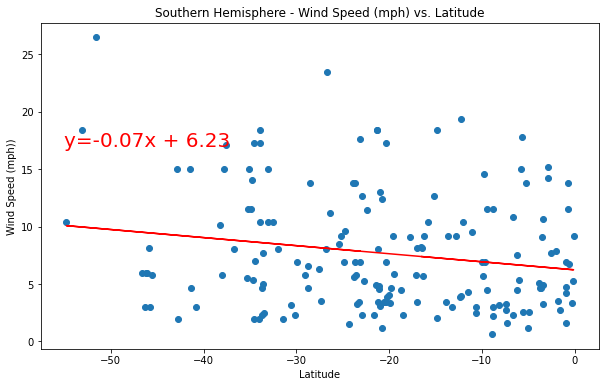

In [24]:
#Create plot using latitude and windspeed from our southern dataframe

xValues=southernFrame['Lat'].astype('float')

yValues=southernFrame['WindSpeed'].astype('float')

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x = xValues, y = yValues)

plt.xlabel("Latitude")

plt.ylabel("Wind Speed (mph))")

#Get slope and intercept from data

(slope, intercept, rvalue, pvalue, stderr)=linregress(xValues,yValues)

#Create line

regressValues=(xValues*slope)+intercept

plt.plot(xValues, regressValues, color='r')

plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')


#Create and annotate line equation

lineEq=f"y={round(slope, 2)}x + {round(intercept, 2)}"

plt.annotate(lineEq, (-55, 17), fontsize=20, color='r')

#Export as png

print(f"The r-value is {rvalue}")

plt.savefig('southernLatitudeVsWindSpeed.png')

plt.show()
